# Деревья решений

### **Цель:** изучить применение дерева решений в рамках задачи регрессии

1. **Загрузим [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) и получим данные**

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
# Загрузка датасета
california_housing = fetch_california_housing()

In [3]:
# Создание DataFrame
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2. **Проведите первичный анализ.**  
  
    a.Проверьте данные на пропуски. Удалите в случае обнаружения.  
    b.*Нормализуйте один из признаков.

In [5]:
# Проверка на наличие пропусков в данных
data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Для нормализации я выберу признак MedInc (средний доход), так как он может сильно варьироваться и влиять на результаты модели. 

In [6]:
# Нормализация признака MedInc с использованием Min-Max нормализации
from sklearn.preprocessing import MinMaxScaler

# Инициализация MinMaxScaler
scaler = MinMaxScaler()

# Нормализация признака MedInc
data['MedInc'] = scaler.fit_transform(data[['MedInc']])

# Проверка результатов
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,0.538027,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,0.466028,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,0.354699,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,0.230776,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Значения MedInc теперь находятся в диапазоне от 0 до 1, что улучшит производительность и точность алгоритмов машинного обучения при использовании этого набора данных.

3. **Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**

In [8]:
from sklearn.model_selection import train_test_split

# Определение признаков (X) и целевой переменной (y)
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размеров полученных наборов данных
train_test_sizes = {
    "X_train": X_train.shape,
    "X_test": X_test.shape,
    "y_train": y_train.shape,
    "y_test": y_test.shape
}

train_test_sizes

{'X_train': (16512, 8),
 'X_test': (4128, 8),
 'y_train': (16512,),
 'y_test': (4128,)}

4. **Обучите [модель регрессии]('https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html') на обучающем множестве.**

In [9]:
from sklearn.linear_model import LinearRegression

# Создание и обучение модели линейной регрессии
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

linear_reg_model.coef_

array([ 6.50587593e+00,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

Высокие положительные значения (например, для MedInc и AveBedrms) указывают на сильное положительное влияние этих признаков на целевую переменную.  
  
Отрицательные значения (например, для AveRooms, Latitude, и Longitude) показывают, что увеличение этих признаков связано с уменьшением целевой переменной.

5. **Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**

In [10]:
# Предсказание на тестовом множестве
y_pred = linear_reg_model.predict(X_test)

# Оценка точности модели на тестовых данных
model_accuracy = linear_reg_model.score(X_test, y_test)

model_accuracy

0.5757877060324511

**Вывод:** Модель показывает не самый лучший результат, что требует дополнительной обработки данных или более сложных моделей.

6. **Обучите [дерево решений]('https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html') на обучающем множестве.**  
  
    a. Повторите п. 5 для полученной модели.  
    b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по [ссылке]('https://mljar.com/blog/visualize-decision-tree/').

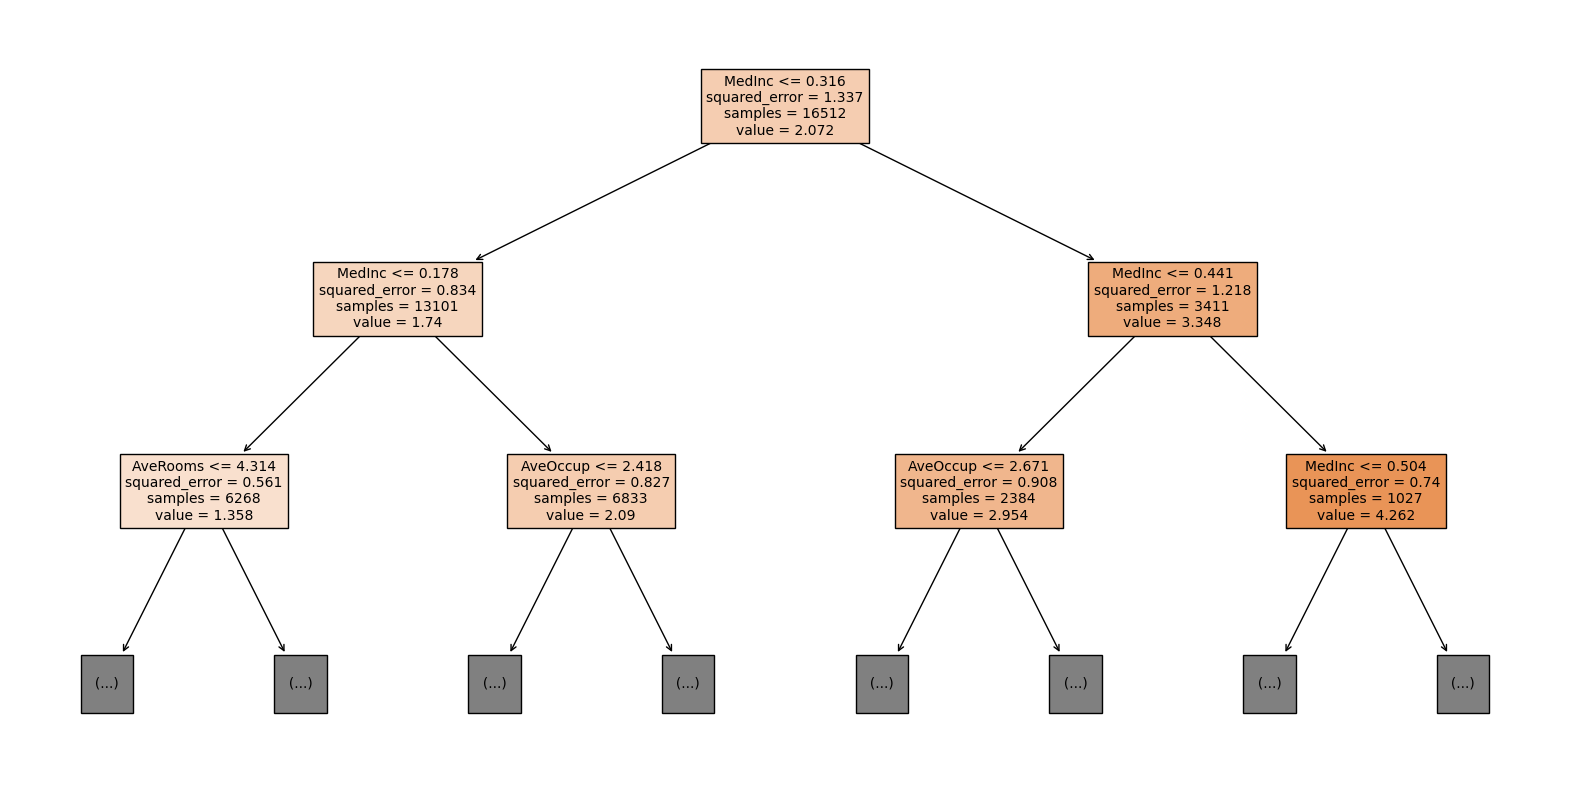

0.622075845135081

In [14]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Обучение модели дерева решений
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Оценка точности модели на тестовых данных
tree_model_accuracy = decision_tree_model.score(X_test, y_test)

# Визуализация части дерева решений
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, max_depth=2, feature_names=X.columns.tolist(), filled=True, fontsize=10)
plt.show()

tree_model_accuracy

**Точность модели:** Модель дерева решений показала точность около 0.622 на тестовом множестве, что указывает на её способность объяснить примерно 62.2% вариабельности целевой переменной.  
  
**Визуализация дерева решений:**  

    - Представлена часть дерева решений с максимальной глубиной 2 для наглядности.
    - узлах дерева отображаются условия разделения, количество образцов, среднее значение и цвет, отображающий преобладающий класс.

**Вывод:** Дерево решений показало себя более эффективным инструментом для моделирования и предсказания стоимости домов в данном наборе данных.

7. **Оптимизируйте глубину дерева (max_depth). Оптимизируйте ещё один параметр модели на выбор.**

    a. Повторите п. 5 для полученной модели. 

Для поиска оптимальных значений использую поиск по сетке (Grid Search) с кросс-валидацией.

In [15]:
from sklearn.model_selection import GridSearchCV

# Параметры для Grid Search
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Создание модели дерева решений для Grid Search
dtree = DecisionTreeRegressor(random_state=42)

# Grid Search с кросс-валидацией
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# Лучшие параметры и их точность
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'max_depth': 10, 'min_samples_split': 20}, 0.7025485067541957)

Найденная комбинация max_depth и min_samples_split значительно улучшила точность модели по сравнению с исходной.  
  
Оптимизированная глубина дерева (10) и минимальное количество образцов для разделения (20) обеспечивают баланс между избежанием переобучения и достаточной глубиной для захвата важных особенностей данных.

In [16]:
# Обучение модели дерева решений с оптимизированными параметрами
optimized_tree_model = DecisionTreeRegressor(max_depth=best_params['max_depth'], 
                                             min_samples_split=best_params['min_samples_split'], 
                                             random_state=42)
optimized_tree_model.fit(X_train, y_train)

# Оценка точности оптимизированной модели на тестовом множестве
optimized_tree_accuracy = optimized_tree_model.score(X_test, y_test)

optimized_tree_accuracy

0.69237655653033

**Вывод:** Оптимизация параметров max_depth и min_samples_split модели дерева решений позволила улучшить её способность предсказывать целевую переменную на тестовых данных. Точность модели увеличилась до 69.2%

8. **Сформулируйте выводы по проделанной работе.**  
  
    a. Сравните точность двух моделей.  
    b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

**Сравнение точности моделей:**  
  
**Линейная регрессия:** Точность около 0.575. Эта модель показала средний уровень точности в предсказании стоимости домов.  
**Дефолтное дерево решений:** Точность около 0.622. Первоначальная модель дерева решений показала улучшенную производительность по сравнению с линейной регрессией.  
**Оптимизированное дерево решений:** Точность увеличилась до примерно 0.692 после оптимизации параметров max_depth и min_samples_split.

**Выбор модели в зависимости от задач:**  
  
**Линейная регрессия:** Хорошо подходит для задач, где взаимосвязь между признаками и целевой переменной предполагается линейной. Преимущества включают простоту понимания и интерпретации. Основной недостаток - ограниченность в работе с нелинейными зависимостями.  
**Дерево решений:** Лучше подходит для нелинейных взаимосвязей и сложных наборов данных. Преимущества - гибкость и способность моделировать сложные структуры данных. Недостатки - склонность к переобучению (что может быть частично решено оптимизацией параметров) и меньшая интерпретируемость по сравнению с линейной моделью.

**Что можно улучшить:**  

В дальнейшем, можно рассмотреть применение ансамблевых методов (например, случайного леса) или более сложных алгоритмов машинного обучения для улучшения точности предсказаний. Эти методы могут помочь в устранении некоторых недостатков базовых моделей, таких как переобучение деревьев решений и ограниченная гибкость линейной регрессии.